# Credit Card Fraud Detection Analysis

In this project, we will be using the Credit Card Fraud Detection Dataset from Kaggle to predict the number of fraud transtations. The dataset utilized covers credit card transactions done by European cardholders in September 2013. This dataset contains 492 frauds out of 284,807 transactions over two days. The dataset is unbalanced, with the positive class (frauds) accounting for 0.172 percent of all transactions

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import scikitplot as skplt
import scipy.stats as stats
import statsmodels.api as sm
import statistics
import sweetviz 
import matplotlib.patches as mpatches
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
import scikitplot as skplt
from yellowbrick.model_selection import FeatureImportances
import scipy.stats as stats
import joblib
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Get the data

# Import csv file

In [2]:
cc_fraud = pd.read_csv("creditcard.csv")

# Quick glance at the data

In [7]:
cc_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
cc_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
cc_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Exploration and Visualization

## check for relative proportion

In [11]:
print("Fraudulent Cases: " + str(len(cc_fraud[cc_fraud["Class"] == 1])))
print("Valid Transactions: " + str(len(cc_fraud[cc_fraud["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(cc_fraud[cc_fraud["Class"] == 1])/ cc_fraud.shape[0]))

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


## Look for missing values

In [12]:
print ('There are {} missing values in the dataset.'.format(np.sum(cc_fraud.isnull( ).values.any( ))))

There are 0 missing values in the dataset.


## Dataset with no zero amount transactions

In [13]:
cc_data = cc_fraud.loc[cc_fraud['Amount'] !=0.00]
fraud_cases= cc_fraud.loc[(cc_fraud['Class']==1) & (cc_fraud['Amount'] != 0)]
non_fraud_cases= cc_fraud.loc[(cc_fraud['Class']==0) & (cc_fraud['Amount']!= 0)]

## Look for zero amounts in the fraudulent dataset & non-fraudulent dataset

In [14]:
# Look for zero amounts in the fraudulent dataset
zero_amount_fraudulent_case = fraud_cases.loc[fraud_cases['Amount']==0.00]

# Look for zero amounts in the non_fraudulent dataset
zero_amount_non_fraudulent_case = non_fraud_cases.loc[non_fraud_cases['Amount']==0.00]

# Look for zero amounts
class1_zero_amounts = cc_fraud.loc[(cc_fraud['Class']==1) & (cc_fraud['Amount']==0)]
class0_zero_amounts = cc_fraud.loc[(cc_fraud['Class']==0) & (cc_fraud['Amount']==0)]

print('There are {} transcations in the fraudulent data and {} transcations in the non-fraudulent data that have zero amount, the whole dataset has {} transcations with zero amounts'.
      format(np.sum(class1_zero_amounts['Amount']==0.00), np.sum(class0_zero_amounts['Amount']==0.00), np.sum(cc_fraud['Amount']==0.00)))

There are 27 transcations in the fraudulent data and 1798 transcations in the non-fraudulent data that have zero amount, the whole dataset has 1825 transcations with zero amounts


## Divide data set into fraudulent and non-fraudulent cases with zero amounts removed

In [15]:
# Divide data set into fraudulent and non-fraudulent cases with zero amounts removed
fraud_cases = cc_data.loc[cc_data['Class'] == 1]
non_fraud_cases = cc_data.loc[cc_data['Class'] == 0]

fraud_cases.shape, non_fraud_cases.shape

((465, 31), (282517, 31))

## Check for duplicates in dataset with no zero amount transactions

In [16]:
# Check for duplicates in dataset with no zero amount transactions
print("There are {} duplicates in this dataset " .format(cc_data.duplicated(keep = "first").sum()))

print("\n")

print('There are {} duplicated fraudulent transactions and {} duplicated non-fraudulent transactions. '.
format((cc_data.loc[cc_data['Class'] == 1]). duplicated(keep = 'first').sum(), (cc_data.loc[cc_data['Class'] == 0]).
duplicated(keep = 'first').sum()))

There are 1064 duplicates in this dataset 


There are 17 duplicated fraudulent transactions and 1047 duplicated non-fraudulent transactions. 


## Remove all duplicates

In [17]:
# Remove all duplicates
cc_data.drop_duplicates(keep ="first", inplace = True)

# Print out the dimension of the dataset
print(cc_data.shape)

# Check for zero amount
print("There are {} transactions with zero amount" . format(np.sum(cc_data['Amount'] == 0.00)))

(281918, 31)
There are 0 transactions with zero amount


## Check if duplicates have been removed

In [18]:
# Check if duplicates have been removed
print("There are {} duplicates " . format(np.sum(cc_data.duplicated(keep = "first"))))
print("After removal of duplicates: There are {} fraudulent and {} non-fraudulent transactions" . format(np.sum(cc_data['Class'] == 1),
                                                                            np.sum(cc_data['Class'] == 0)))

There are 0 duplicates 
After removal of duplicates: There are 448 fraudulent and 281470 non-fraudulent transactions


## Most frequent amount

In [19]:
# Most frequent amount
print(statistics.mode(fraud_cases['Amount']))
print(statistics.mode(non_fraud_cases['Amount']))
print(np.sum(cc_data['Amount'] == 1.00))
print(max(fraud_cases['Amount']))

1.0
1.0
13566
2125.87


## Check for fraud transaction bank notes & Normal transcation bank notes

In [22]:
# Check for fraud transaction bank notes &  Normal  transcation bank notes
all_bank_notes = cc_data.loc[cc_data['Amount'] %10 == 0]
fraudulent_transaction_banknote = fraud_cases.loc[fraud_cases['Amount'] %10 == 0]
non_fraudulent_transaction_banknote = non_fraud_cases.loc[non_fraud_cases['Amount'] %10 == 0]

print("There are" , np.sum(fraud_cases['Amount'] %10 == 0), "bank notes in fraudulent transcations.")
print("There are", np.sum(non_fraud_cases['Amount'] %10 == 0), "bank notes in normal transcations.")
print("There are", np.sum(cc_data['Amount'] %10 == 0), "bank notes in the whole dataset")

There are 8 bank notes in fraudulent transcations.
There are 16250 bank notes in normal transcations.
There are 16221 bank notes in the whole dataset


In [21]:
# # Remove bank notes from the fraud dataset
# cp_fraud = fraud_cases.loc[fraud_cases['Amount'] %10 == 0] # Card not Present fraud
# cnp_fraud = fraud_cases # Card Present fraud

less2500= np.sum(cc_data['Amount'] < 2500)
more2500 = np.sum(cc_data['Amount'] >= 2500)
print("{}% of the transactions have transaction amount less than 2500 and {}% have transaction amount more than 2500 ".
format(round(less2500/len(cc_data)*100,3), round(more2500/len(cc_data)*100,3)))

print(less2500)

99.841% of the transactions have transaction amount less than 2500 and 0.159% have transaction amount more than 2500 
281469


## Amount variable

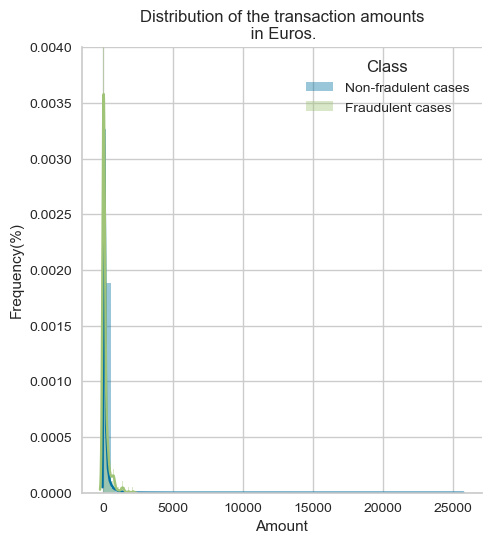

In [20]:
# Plot histogram for Amount variable
g = sns.FacetGrid(cc_data, hue = "Class", legend_out = False)
g.map(sns.distplot, "Amount")
g.add_legend( )
plt.gcf().set_size_inches(6,6)
plt.ylim (0,0.004)
plt.title("Distribution of the transaction amounts\n in Euros.")
new_labels = ['Non-fradulent cases', 'Fraudulent cases']
for t , l  in zip (g._legend.texts, new_labels ): t.set_text(l)
plt.ylabel("Frequency(%)")
plt.show()

## Amount variable (fraudulent transactions & non-fraudulent transactions)

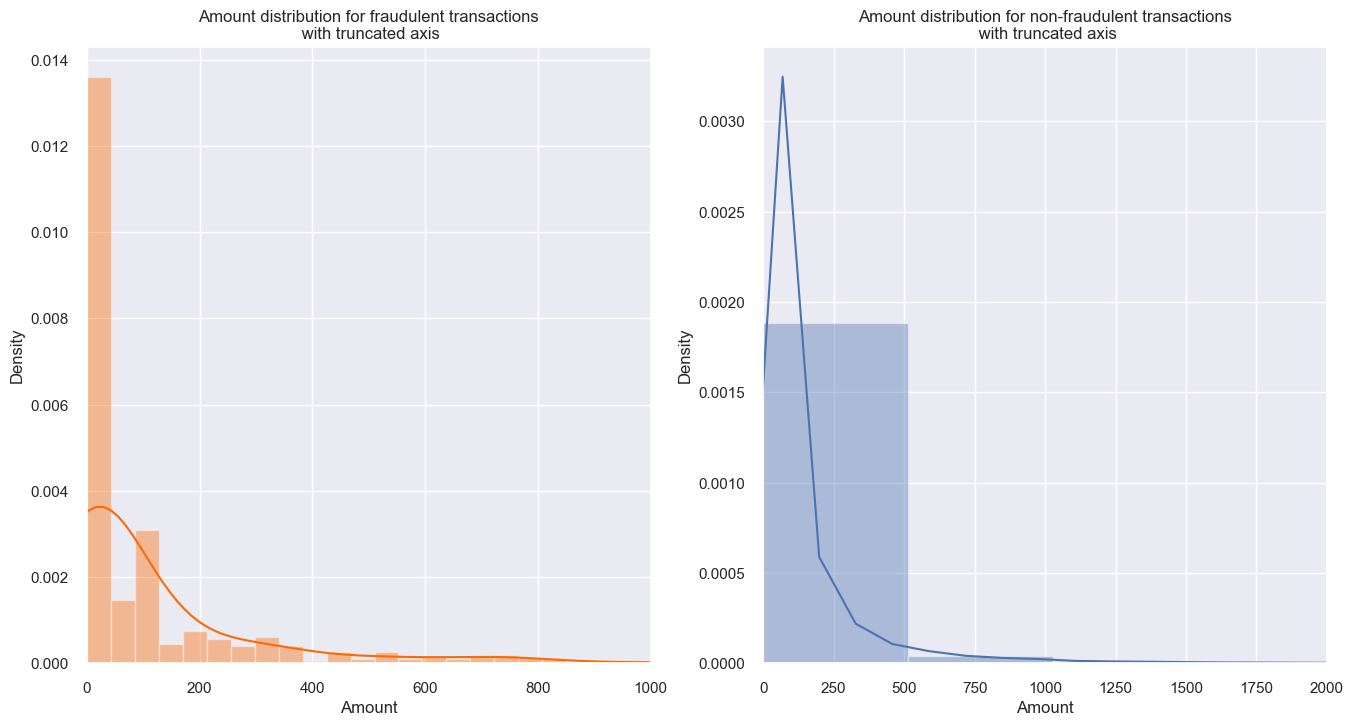

In [23]:
sns.set(rc= {"figure.figsize":(16,8)})
fig, axes = plt.subplots(1,2)
sns.distplot(fraud_cases['Amount'], kde = "true", ax = axes[0], color = "#FC6A03")
sns.distplot(non_fraud_cases["Amount"], kde = "True", ax = axes[1])
#Truncate the x = axis?
axes[0].set_xlim(0,1000)
axes[1].set_xlim(0,2000)

axes[0].set_title("Amount distribution for fraudulent transactions\n with truncated axis")
axes[1].set_title("Amount distribution for non-fraudulent transactions\n with truncated axis")
plt.show()

## Time variable

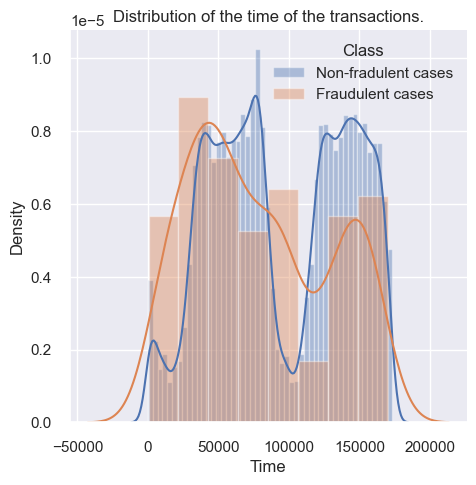

In [24]:
g=sns.FacetGrid(cc_data, hue = "Class", legend_out = False)
g.map(sns.distplot, "Time")
g.add_legend()
plt.ylabel("Density")
plt.title("Distribution of the time of the transactions.")
plt.gcf().set_size_inches(6,6)
new_labels = ['Non-fradulent cases', 'Fraudulent cases']
for t , l in zip (g._legend.texts, new_labels): t.set_text(l)
plt.show()

## Time variable (fraudulent transactions & non-fraudulent transactions)

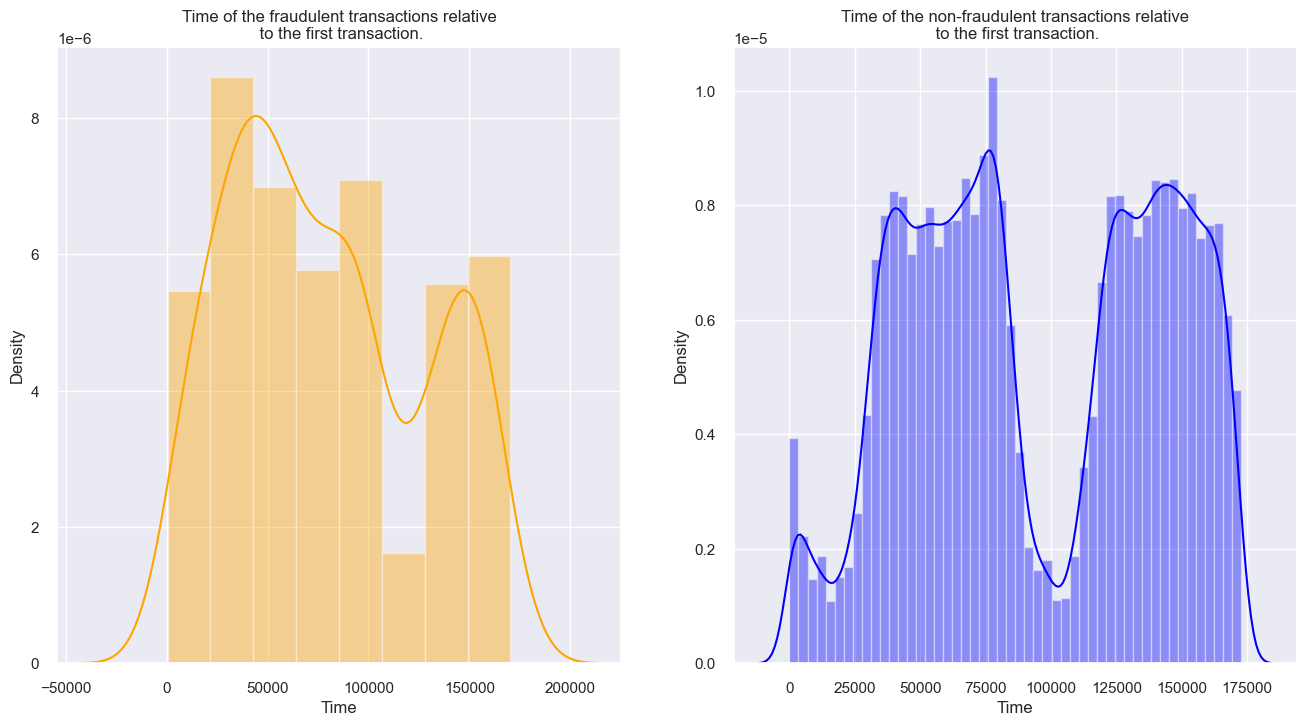

In [25]:
sns.set(rc = {"figure.figsize": (16,8)})
fig, axes = plt.subplots(1,2)
sns.distplot(fraud_cases['Time'], color = "orange", kde = True, ax = axes[0])
sns.distplot(non_fraud_cases["Time"], color = "blue", kde = True, ax = axes[1])
axes[0].set_title("Time of the fraudulent transactions relative\n to the first transaction.")
axes[1].set_title("Time of the non-fraudulent transactions relative\n to the first transaction.")
plt.show()

## Time vs Amount

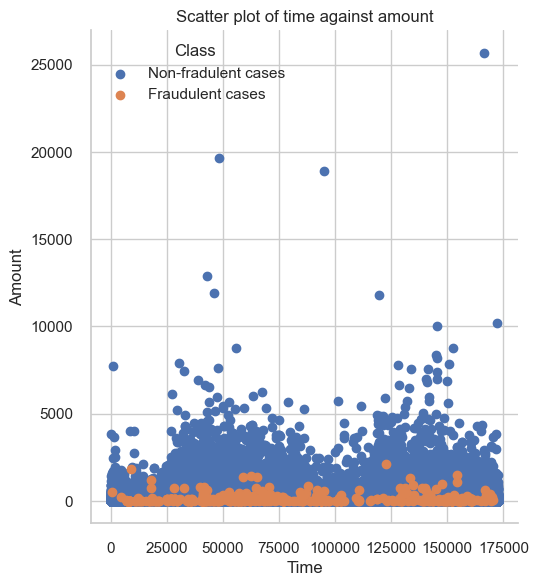

In [26]:
sns.set_style("whitegrid")
g = sns. FacetGrid(cc_data, hue = "Class" , legend_out = False)
g.map(plt.scatter , "Time" , "Amount")
plt.title("Scatter plot of time against amount")
g.add_legend()
new_labels = ['Non-fradulent cases' , 'Fraudulent cases']
for t , l in zip (g._legend.texts , new_labels ): t.set_text(l)
plt.gcf().set_size_inches(7,7)
plt.show()

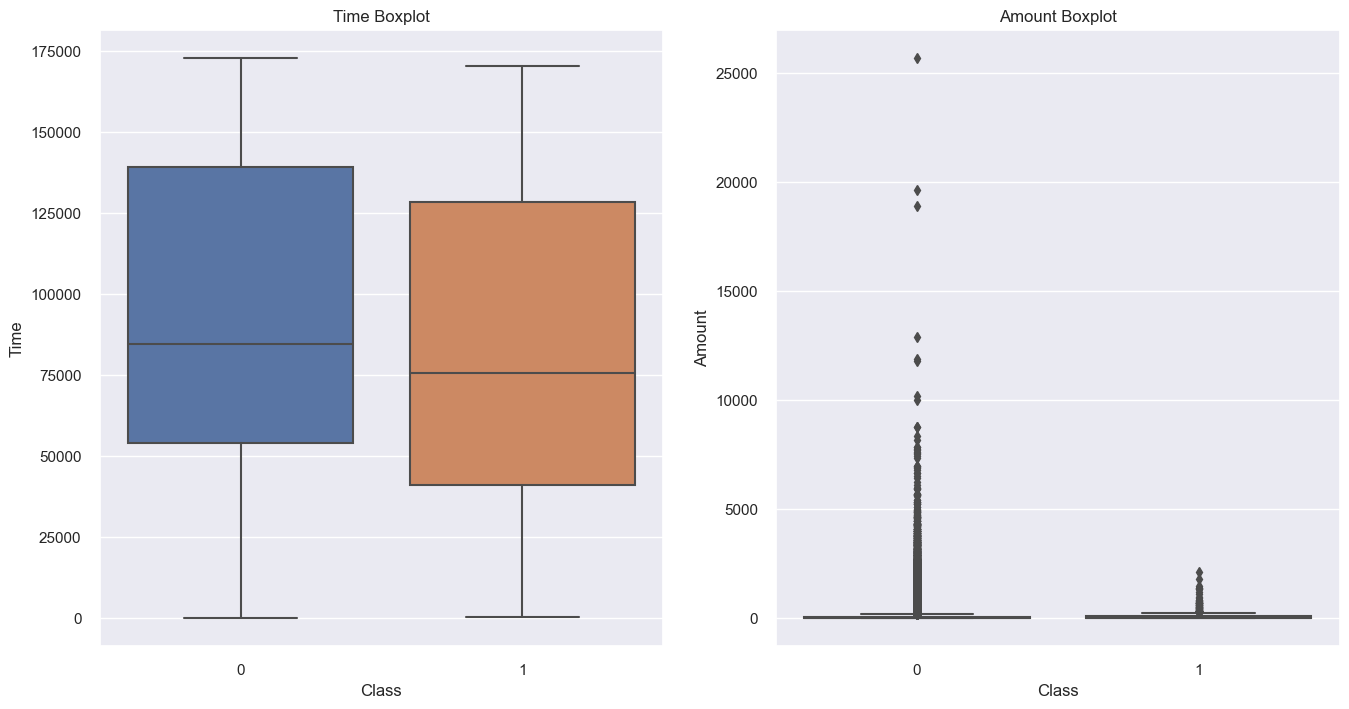

In [27]:
# boxplot
sns.set(rc = {"figure.figsize": (16,8)})
fig, ax = plt.subplots(1,2)
g = sns.boxplot(x = "Class", y = "Time" , data = cc_fraud, ax = ax[0])
sns.boxplot(x = "Class" , y = "Amount" , data = cc_fraud, ax = ax[1])
new_labels = ['Non-fradulent cases' , 'Fraudulent cases']
ax[0].set_title("Time Boxplot")
ax[1].set_title("Amount Boxplot")
plt.show()

## The money stolen between 25000 and 100000 seconds

In [25]:
sum=0
for i in range(len(cc_fraud)):
    if ((cc_fraud.iloc[i]['Time']>25000 and cc_fraud.iloc[i]["Time"]<=100000) and cc_fraud.iloc[i]['Class']==1):
        sum=sum + cc_fraud.iloc[i]['Amount']
        print("The money stolen between 25000 and 100000 seconds is" ,round(sum,2))

The money stolen between 25000 and 100000 seconds is 3.12
The money stolen between 25000 and 100000 seconds is 103.11
The money stolen between 25000 and 100000 seconds is 203.1
The money stolen between 25000 and 100000 seconds is 303.09
The money stolen between 25000 and 100000 seconds is 306.85
The money stolen between 25000 and 100000 seconds is 406.84
The money stolen between 25000 and 100000 seconds is 506.83
The money stolen between 25000 and 100000 seconds is 606.82
The money stolen between 25000 and 100000 seconds is 706.81
The money stolen between 25000 and 100000 seconds is 806.8
The money stolen between 25000 and 100000 seconds is 906.79
The money stolen between 25000 and 100000 seconds is 1006.78
The money stolen between 25000 and 100000 seconds is 1106.77
The money stolen between 25000 and 100000 seconds is 1206.76
The money stolen between 25000 and 100000 seconds is 1306.75
The money stolen between 25000 and 100000 seconds is 1406.74
The money stolen between 25000 and 1000

## The money stolen above 100000 seconds

In [27]:
sum=0
for i in range(len(cc_fraud)):
    if (cc_fraud.iloc[i]['Time']>100000 and cc_fraud.iloc[i]['Class']==1):
        sum=sum + cc_fraud.iloc[i]['Amount']
        print("The money stolen above 100000 seconds is" ,round(sum,2))

The money stolen above 100000 seconds is 2.28
The money stolen above 100000 seconds is 3.28
The money stolen above 100000 seconds is 4.04
The money stolen above 100000 seconds is 5.04
The money stolen above 100000 seconds is 5.96
The money stolen above 100000 seconds is 8.24
The money stolen above 100000 seconds is 156.11
The money stolen above 100000 seconds is 156.11
The money stolen above 100000 seconds is 178.15
The money stolen above 100000 seconds is 178.15
The money stolen above 100000 seconds is 282.15
The money stolen above 100000 seconds is 284.43
The money stolen above 100000 seconds is 284.44
The money stolen above 100000 seconds is 285.44
The money stolen above 100000 seconds is 632.38
The money stolen above 100000 seconds is 639.97
The money stolen above 100000 seconds is 639.97
The money stolen above 100000 seconds is 639.97
The money stolen above 100000 seconds is 759.71
The money stolen above 100000 seconds is 761.98
The money stolen above 100000 seconds is 761.98
The 

## Stolen Amount

In [32]:
total_amount=np.sum(cc_fraud['Amount'])
stolen_amount_percentage=(np.sum(fraud_cases[ 'Amount'])/total_amount)*100
print("The stolen amount percentage is" ,round(stolen_amount_percentage,2),'%')
print("Total stolen amount", np.sum(fraud_cases['Amount']))

The stolen amount percentage is 0.24 %
Total stolen amount 60127.97


# Prepare the data

# Split the data into training and test sets

In [3]:
# split the data into train and test
from sklearn.model_selection import train_test_split

def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [4]:
cc_train_original, cc_test_original = data_split(cc_fraud, 0.2)

In [5]:
cc_train_original.shape, cc_test_original.shape

((227845, 31), (56962, 31))

In [6]:
# creating a copy of the dataset so that the original stays untouched
cc_train_copy = cc_train_original.copy()
cc_test_copy = cc_test_original.copy()

## Min-Max scaling

In [7]:
class MinMaxWithFeatNames(BaseEstimator, TransformerMixin):
    def __init__(self, min_max_scaler_ft=None):
        self.min_max_scaler_ft = min_max_scaler_ft or []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        missing_features = set(self.min_max_scaler_ft) - set(X.columns)
        if missing_features:
            raise ValueError(f"Features not found in DataFrame: {missing_features}")

        min_max_enc = MinMaxScaler()
        X[self.min_max_scaler_ft] = min_max_enc.fit_transform(X[self.min_max_scaler_ft])
        return X

## Oversampling

In [8]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Class' in df.columns:
            # smote function to oversample the minority class to fix the imbalance data
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != 'Class'],df['Class'])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("Class is not in the dataframe")
            return df

# Data Preprocessing

In [9]:
# Create the pipeline
pipeline = Pipeline([
    ('min_max_with_feat_names', MinMaxWithFeatNames(min_max_scaler_ft=['Time', 'Amount'])),
    ('oversample', Oversample())
])

In [10]:
# Apply the pipeline to the DataFrame
pd.options.mode.chained_assignment = None
cc_train_prep = pipeline.fit_transform(cc_train_copy)

In [11]:
cc_test_prep = pipeline.fit_transform(cc_test_copy)

In [12]:
cc_train_prep.shape, cc_test_prep.shape

((454902, 31), (113728, 31))

In [13]:
# split the train data into X and y (target)
X_train, y_train = cc_train_prep.loc[:, cc_train_prep.columns != 'Class'], cc_train_prep['Class'].astype('int64')

In [14]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.829622,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,0.000389
1,0.678116,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0.001787
2,0.865578,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,0.000467
3,0.542097,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.004571
4,0.478350,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,0.001003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,0.946267,1.731056,-0.232324,-2.393749,0.545549,0.625789,-0.513721,0.324215,-0.178096,0.759968,...,0.217473,-0.048105,-0.227464,-0.125351,-0.374038,0.152800,-0.416035,0.002858,0.018881,0.006442
454898,0.344863,1.123167,3.111190,-4.592652,4.693427,3.385092,-1.354539,1.426176,-1.015276,-1.602947,...,-0.144085,0.320411,-0.726287,-0.258710,-1.457464,0.400587,0.344657,0.060449,0.131687,0.000035
454899,0.323764,0.339731,1.985053,-2.760029,3.795938,-0.473533,-1.104423,-2.028165,0.560792,-2.315175,...,0.327019,0.315985,-0.541277,-0.200165,-0.371402,0.739556,0.074357,0.552938,0.317554,0.000132
454900,0.444875,-0.887762,1.115267,-0.391405,1.417477,1.703883,-2.010747,0.502615,-0.096141,-0.145996,...,-0.157002,-0.338625,-0.828249,-0.332618,0.196697,0.485772,-0.487445,0.017967,0.133908,0.000039


In [15]:
# split the train test into X and y (target)
X_test, y_test = cc_test_prep.loc[:, cc_test_prep.columns != 'Class'], cc_test_prep['Class'].astype('int64')

In [16]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.240209,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,0.036419
1,0.256159,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0.052012
2,0.205363,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.003100
3,0.967220,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0.000150
4,0.975033,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.000089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113723,0.883646,-4.257815,4.379624,-8.364527,7.435806,-1.225076,-2.045356,-3.956710,0.929924,-1.823816,...,-0.056232,0.523859,0.367694,0.447543,-0.682499,-0.146964,0.308550,-2.117274,0.410924,0.000194
113724,0.498631,-5.797519,3.913489,-7.284640,7.091599,-2.836997,-1.651441,-6.405211,2.866909,-4.193568,...,0.047143,1.179585,0.322878,0.139665,-0.537120,0.087964,0.285712,0.262176,-0.256985,0.000029
113725,0.248971,-7.568688,6.315149,-11.099436,4.192971,-6.319642,-3.155359,-7.086886,5.385750,-2.499494,...,0.820643,0.915237,-0.662517,0.140361,-0.057860,0.400707,-0.266462,1.185843,0.253319,0.009999
113726,0.342056,-4.309205,2.772558,-2.857655,3.571533,-2.137305,-0.769548,-3.053403,-0.786845,-2.119739,...,-0.235986,1.801745,-0.552390,-0.078045,0.073573,0.006158,-0.360100,-1.079188,-0.935246,0.012069


## Model building

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [20]:
model_list = [
    LogisticRegression(random_state=42,max_iter=1000),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    MLPClassifier(random_state=42,max_iter=1000)
]

LogisticRegression(max_iter=1000, random_state=42)
Accuracy Score is 0.94303
Confusion Matrix:
[[55339  1525]
 [ 4954 51910]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     56864
           1       0.97      0.91      0.94     56864

    accuracy                           0.94    113728
   macro avg       0.94      0.94      0.94    113728
weighted avg       0.94      0.94      0.94    113728



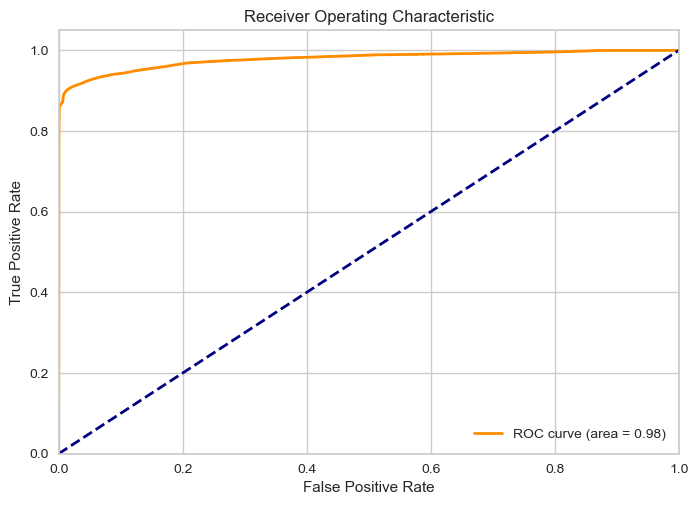



RandomForestClassifier(random_state=42)
Accuracy Score is 0.92998
Confusion Matrix:
[[56854    10]
 [ 7953 48911]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     56864
           1       1.00      0.86      0.92     56864

    accuracy                           0.93    113728
   macro avg       0.94      0.93      0.93    113728
weighted avg       0.94      0.93      0.93    113728



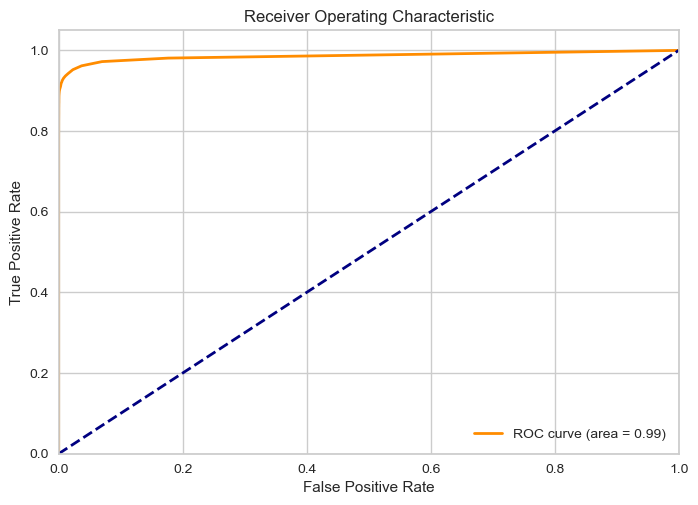



DecisionTreeClassifier(random_state=42)
Accuracy Score is 0.8884
Confusion Matrix:
[[56709   155]
 [12537 44327]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56864
           1       1.00      0.78      0.87     56864

    accuracy                           0.89    113728
   macro avg       0.91      0.89      0.89    113728
weighted avg       0.91      0.89      0.89    113728



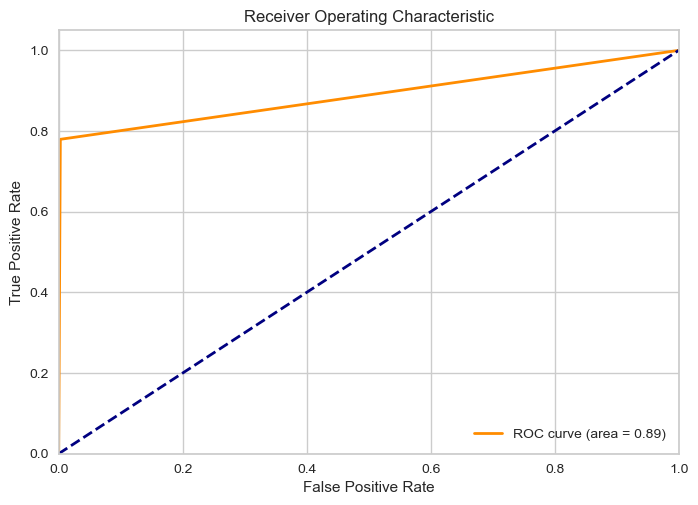



MLPClassifier(max_iter=1000, random_state=42)
Accuracy Score is 0.9307
Confusion Matrix:
[[56840    24]
 [ 7857 49007]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56864
           1       1.00      0.86      0.93     56864

    accuracy                           0.93    113728
   macro avg       0.94      0.93      0.93    113728
weighted avg       0.94      0.93      0.93    113728



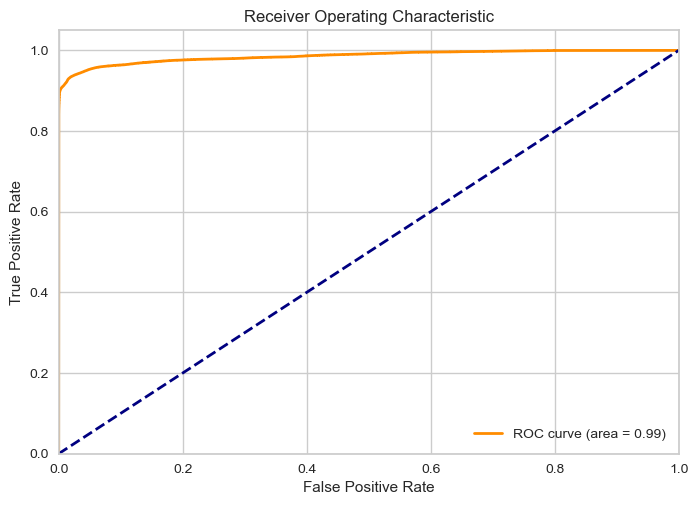

In [21]:
for model in model_list:
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        y_predict_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_predict_proba = model.decision_function(X_test)
    
    print(str(model))
    print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
    
    # Confusion matrix and classification report
    confusion_mat = confusion_matrix(y_test, y_predict)
    class_report = classification_report(y_test, y_predict)
    
    print('Confusion Matrix:')
    print(confusion_mat)
    print('Classification Report:')
    print(class_report)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_predict_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print('\n')

## Fine tuning the mode